In [ ]:
# Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from random import randrange
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

pd.options.mode.chained_assignment = None 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = 'https://drive.google.com/file/d/17sYin-6UeTSmLZvKwZwERETShJh0-XRs/view?usp=share_link'
movies_pre_df = pd.read_csv('/content/drive/MyDrive/WiDS project/IMDb movies.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
movies_pre_df.head(10)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,...,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,NaN,7.0,5.0
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,"Aristide Demetriade, Constanta Demetriade, Con...",The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,NaN,NaN,NaN,8.0,1.0


In [ ]:
movies_pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [ ]:
# Checking null values
movies_pre_df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [ ]:
movies_pre_df.drop(['production_company',
                'avg_vote','votes','reviews_from_critics', 'budget','usa_gross_income', 'worlwide_gross_income', 'metascore'
                ,'reviews_from_users'], axis = 1, inplace = True)

In [ ]:
movies_pre_df.year.unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [ ]:
 movies_pre_df[movies_pre_df['year'] == 'TV Movie 2019']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,actors,description
83917,tt8206668,Bad Education,Bad Education,TV Movie 2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker","Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...


In [ ]:
try : movies_pre_df['year'] = movies_pre_df['year'].astype(int)
except: movies_pre_df[movies_pre_df['year'] == 'TV Movie 2019']  = 2019
movies_pre_df['year'] = movies_pre_df['year'].astype(int)

In [ ]:
movies_pre_df.year.unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020])

In [ ]:
year_counts = movies_pre_df['year'].value_counts()
year_counts

2017    3329
2018    3257
2016    3138
2015    2977
2014    2942
        ... 
1913      13
1911       5
1912       5
1906       1
1894       1
Name: year, Length: 112, dtype: int64

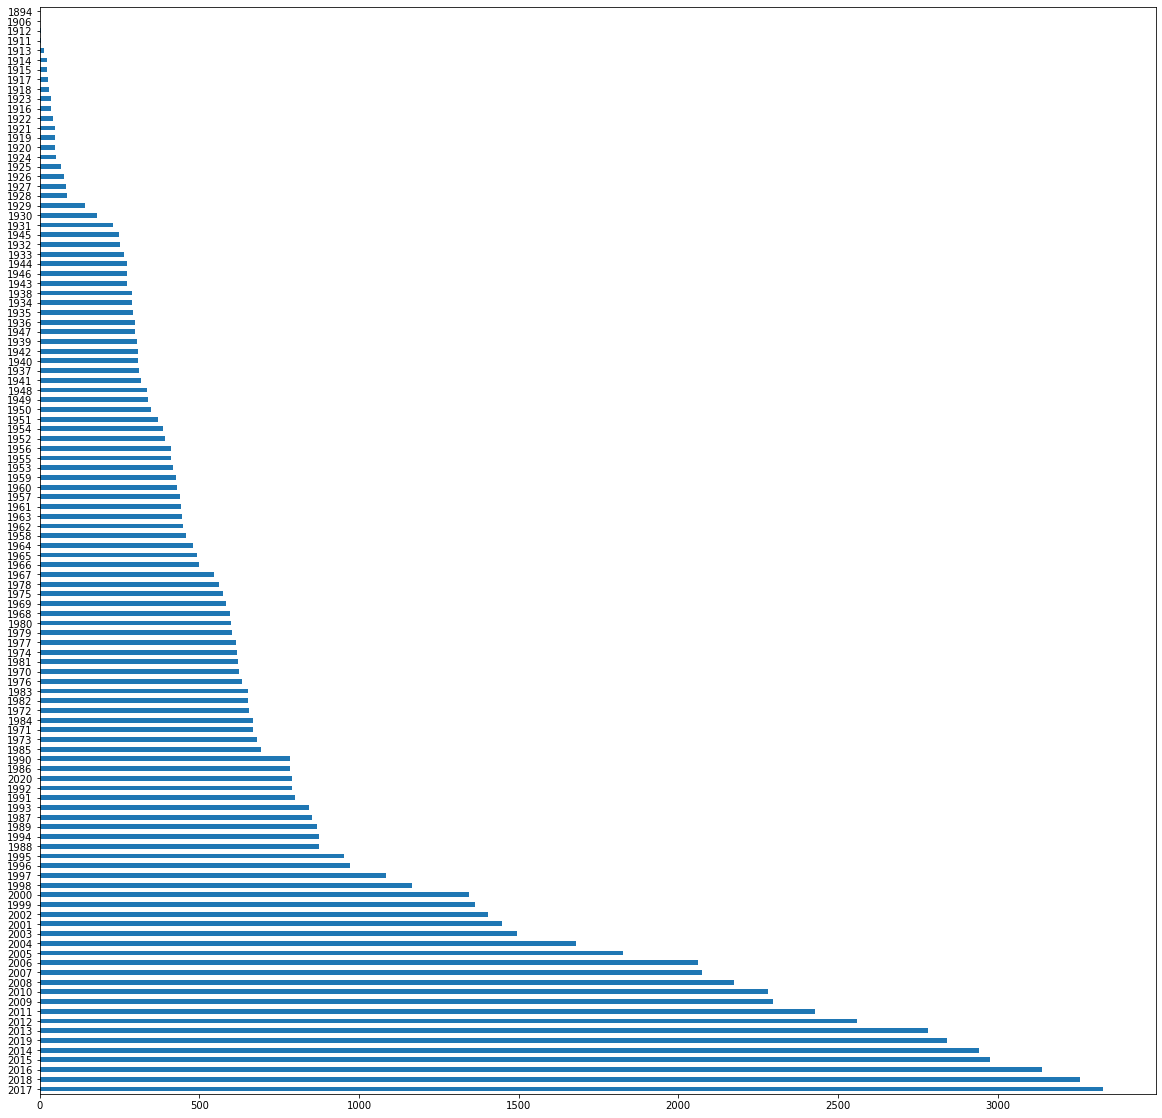

In [ ]:
year_counts.plot(kind = 'barh', figsize = (20,20))
plt.show()

In [ ]:
lang_counts = movies_pre_df['language'].value_counts()


In [ ]:
top50 = lang_counts.keys()[:50]
top50

Index(['English', 'French', 'Spanish', 'Japanese', 'Italian', 'Hindi',
       'German', 'Turkish', 'Russian', 'English, Spanish', 'Korean',
       'Portuguese', 'English, French', 'Malayalam', 'Tamil', 'Mandarin',
       'Telugu', 'Cantonese', 'Persian', 'Swedish', 'Polish', 'Greek',
       'Arabic', 'Dutch', 'Danish', 'Bengali', 'French, English',
       'English, German', 'Finnish', 'English, Italian', 'Czech', 'Hungarian',
       'Norwegian', 'Romanian', 'Thai', 'Indonesian', 'English, Japanese',
       'Serbo-Croatian', 'Spanish, English', 'Kannada', 'English, Russian',
       'Cantonese, Mandarin', 'Italian, English', 'Japanese, English',
       'Serbian', 'Hindi, English', 'German, English', 'Filipino, Tagalog',
       'Hebrew', 'Punjabi'],
      dtype='object')

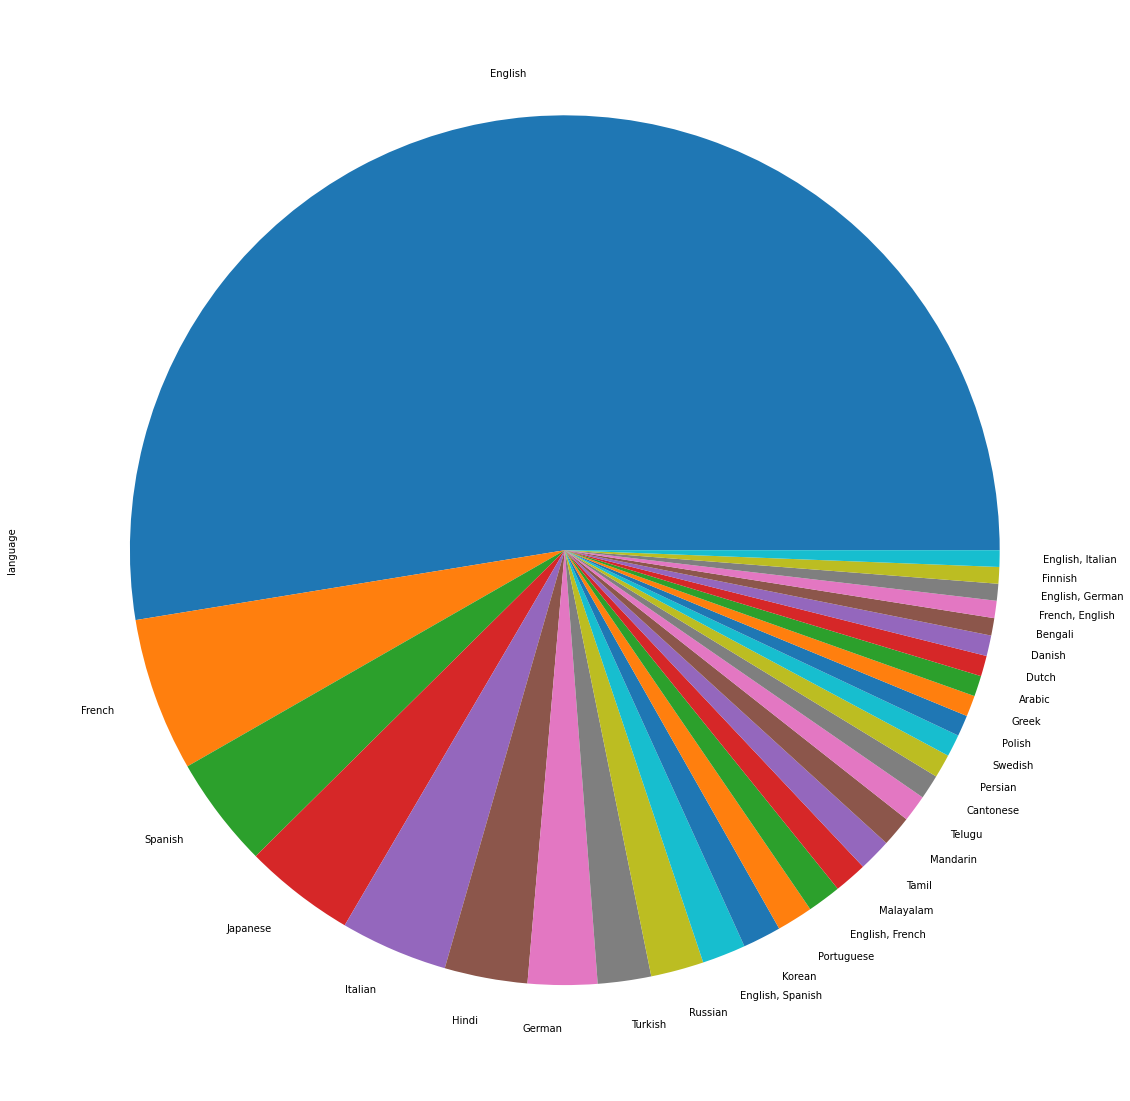

In [ ]:
lang_counts[:30].plot(kind = 'pie', figsize = (20,20))
plt.show()

In [ ]:
movies_pre_df = movies_pre_df[movies_pre_df['language'] == 'English']
movies_pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35938 entries, 3 to 85839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_title_id   35938 non-null  object
 1   title           35938 non-null  object
 2   original_title  35938 non-null  object
 3   year            35938 non-null  int64 
 4   date_published  35938 non-null  object
 5   genre           35938 non-null  object
 6   duration        35938 non-null  int64 
 7   country         35907 non-null  object
 8   language        35938 non-null  object
 9   director        35898 non-null  object
 10  writer          35678 non-null  object
 11  actors          35911 non-null  object
 12  description     35818 non-null  object
dtypes: int64(2), object(11)
memory usage: 3.8+ MB


In [ ]:
year_counts = movies_eng_df['year'].value_counts()
year_counts

NameError: ignored

In [ ]:
movies_pre_df['country'] = movies_pre_df['country'].astype(str)

In [ ]:
country_counts = movies_pre_df['country'].value_counts()
country_counts

USA                           24830
UK                             3558
Canada                         1267
Australia                       701
UK, USA                         506
                              ...  
Australia, UK, USA, France        1
UK, Netherlands, USA              1
Canada, UK, France                1
USA, UK, Italy                    1
USA, South Africa, Canada         1
Name: country, Length: 1330, dtype: int64

In [ ]:
# Checking null values
movies_pre_df.isnull().sum()

imdb_title_id       0
title               0
original_title      0
year                0
date_published      0
genre               0
duration            0
country             0
language            0
director           40
writer            260
actors             27
description       120
dtype: int64

In [ ]:
movies_pre_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,actors,description
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ..."
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare","Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken","Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,NaN,"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85827,tt9883996,Dream Horse,Dream Horse,2020,2020-09-04,"Biography, Comedy, Drama",113,UK,English,Euros Lyn,Neil McKay,"Toni Collette, Damian Lewis, Siân Phillips, Jo...",Dream Alliance is an unlikely race horse bred ...
85830,tt9887580,Bulletproof 2,Bulletproof 2,2020,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,"Don Michael Paul, Rich Wilkes","Faizon Love, Kirk Fox, Tony Todd, Cassie Clare...","Set 25 years after, Jack is now working as a S..."
85837,tt9894470,VFW,VFW,2019,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,"Max Brallier, Matthew McArdle","Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...
85838,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,2019-04-18,"Animation, Adventure, Family",108,USA,English,Robert Fernandez,"John Bunyan, Robert Fernandez","David Thorpe, John Rhys-Davies, Kristyn Getty,...","An epic journey, faithfully adapted to modern-..."


In [ ]:
movies_rec_df = movies_pre_df[movies_pre_df['year'] > 2000 ]

In [ ]:
movies_rec_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,actors,description
21806,tt0088751,The Naked Monster,The Naked Monster,2005,2005-04-22,"Comedy, Horror, Sci-Fi",100,USA,English,"Wayne Berwick, Ted Newsom",Ted Newsom,"Kenneth Tobey, Brinke Stevens, R.G. Wilson, Jo...","A brain-dead sheriff, a stolid secret agent an..."
29307,tt0114447,The Silent Force,The Silent Force,2001,2001-05-22,Action,90,USA,English,David H. May,David H. May,"Loren Avedon, Brian Tochi, Karen Kim, George C...",An elite Federal force whose objective is to e...
30290,tt0118141,What Is It?,What Is It?,2005,2005-01-27,Drama,72,USA,English,Crispin Glover,Crispin Glover,"Michael Blevis, Carlos Richardson, Lisa Fusco,...","What Is It? is a bewildering, unnerving, surre..."
30350,tt0118589,Glitter,Glitter,2001,2001-11-30,"Drama, Music, Romance",104,USA,English,Vondie Curtis-Hall,"Cheryl L. West, Kate Lanier","Mariah Carey, Max Beesley, Da Brat, Tia Texada...",A young singer dates a disc jockey who helps h...
30377,tt0118652,Horror in the Attic,The Attic Expeditions,2001,2009-07-02,"Comedy, Horror, Mystery",100,USA,English,Jeremy Kasten,Rogan Russell Marshall,"Andras Jones, Seth Green, Jeffrey Combs, Wendy...",Trevor is a young man who has been sentenced t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85827,tt9883996,Dream Horse,Dream Horse,2020,2020-09-04,"Biography, Comedy, Drama",113,UK,English,Euros Lyn,Neil McKay,"Toni Collette, Damian Lewis, Siân Phillips, Jo...",Dream Alliance is an unlikely race horse bred ...
85830,tt9887580,Bulletproof 2,Bulletproof 2,2020,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,"Don Michael Paul, Rich Wilkes","Faizon Love, Kirk Fox, Tony Todd, Cassie Clare...","Set 25 years after, Jack is now working as a S..."
85837,tt9894470,VFW,VFW,2019,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,"Max Brallier, Matthew McArdle","Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...
85838,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,2019-04-18,"Animation, Adventure, Family",108,USA,English,Robert Fernandez,"John Bunyan, Robert Fernandez","David Thorpe, John Rhys-Davies, Kristyn Getty,...","An epic journey, faithfully adapted to modern-..."


In [ ]:
movies_df = movies_rec_df.copy()
movies_df.drop([ 'country', 'language','imdb_title_id', 'title', 'year', 'date_published',
                'duration', 'director', 'writer'], axis=1, inplace=True)
movies_df.rename(columns = {'original_title' : 'title'}, inplace = True )

In [ ]:
 # Merging genre and actors columns with description and filling nan values
movies_df['actors'] = movies_df['actors'].fillna('')
movies_df['genre'] = movies_df['genre'].fillna('')
movies_df['description'] = movies_df['genre'] + movies_df['actors']
movies_df['description'] = movies_df['description'].fillna('')
movies_df.drop(columns = ['actors', 'genre'], inplace = True)
movies_df

,title,description
21806,The Naked Monster,"Comedy, Horror, Sci-FiKenneth Tobey, Brinke St..."
29307,The Silent Force,"ActionLoren Avedon, Brian Tochi, Karen Kim, Ge..."
30290,What Is It?,"DramaMichael Blevis, Carlos Richardson, Lisa F..."
30350,Glitter,"Drama, Music, RomanceMariah Carey, Max Beesley..."
30377,The Attic Expeditions,"Comedy, Horror, MysteryAndras Jones, Seth Gree..."
...,...,...
85827,Dream Horse,"Biography, Comedy, DramaToni Collette, Damian ..."
85830,Bulletproof 2,"Action, ComedyFaizon Love, Kirk Fox, Tony Todd..."
85837,VFW,"Action, Crime, HorrorStephen Lang, William Sad..."
85838,The Pilgrim's Progress,"Animation, Adventure, FamilyDavid Thorpe, John..."


In [ ]:
movies_df.reset_index(inplace = True, drop = True)

In [ ]:
movies_df.head(20)


,title,description
0,The Naked Monster,"Comedy, Horror, Sci-FiKenneth Tobey, Brinke St..."
1,The Silent Force,"ActionLoren Avedon, Brian Tochi, Karen Kim, Ge..."
2,What Is It?,"DramaMichael Blevis, Carlos Richardson, Lisa F..."
3,Glitter,"Drama, Music, RomanceMariah Carey, Max Beesley..."
4,The Attic Expeditions,"Comedy, Horror, MysteryAndras Jones, Seth Gree..."
5,Don's Plum,"Comedy, DramaScott Bloom, Kevin Connolly, Tobe..."
6,The Junior Defenders,"ComedyAlly Sheedy, Brian O'Halloran, Justin He..."
7,Quality Time,"Comedy, Drama, Sci-FiCorin Nemec, Bruce Weitz,..."
8,Fantastic Four,"Action, Adventure, FantasyIoan Gruffudd, Jessi..."
9,From Hell,"Horror, Mystery, ThrillerJohnny Depp, Heather ..."


In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')


In [ ]:
tfidf_matrix = tf.fit_transform(movies_df['description'])


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
tfidf_matrix2 = tf.fit_transform(movies_df['description'].sample(n=50))
cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)


Correlation of 50 randomly sampled movies


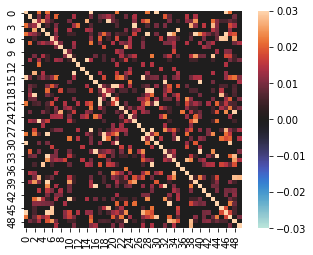

In [ ]:
print('Correlation of 50 randomly sampled movies')
ax = sns.heatmap(
    cosine_sim2, 
    vmin=-0.03, vmax=0.03, center=0,
    square=True
)

In [ ]:
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])
indices

title
The Naked Monster             0
The Silent Force              1
What Is It?                   2
Glitter                       3
The Attic Expeditions         4
                          ...  
Dream Horse               16893
Bulletproof 2             16894
VFW                       16895
The Pilgrim's Progress    16896
Coffee & Kareem           16897
Length: 16898, dtype: int64

In [ ]:
def content_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    print(movie_indices)
    return titles.iloc[movie_indices], sim_scores

In [ ]:
movieid = int(input("Enter Movie ID: "))

Enter Movie ID: 50


In [ ]:
random_movie = movieid
print('Content based Movie Recommendations for')
print(movies_df.loc[random_movie, 'title'])

rec_titles, rec_scores = content_recommender(random_movie)
print()
for i in range(5):
    print("{} with score: {}".format(rec_titles.iloc[i], rec_scores[i][1]))

Content based Movie Recommendations for
Ghost World
[2341, 6057, 4732, 4300, 477]

The Island with score: 0.07207332974558674
Rage with score: 0.07131244411012354
Winter of Frozen Dreams with score: 0.06421469665800678
Hotel Transylvania with score: 0.061983822559804364
Bubble Boy with score: 0.058913141612359124
